In [4]:
%autosave 2
import numpy as np
import pandas
import gzip

Autosaving every 2 seconds


In [2]:
filename = 'V404Cyg.txt.gz'

In [5]:
with gzip.open(filename) as f:
    print(f.readline())
    print(f.readline())

b'JD\tMagnitude\tUncertainty\tHQuncertainty\tBand\tObserver Code\tComment Code(s)\tComp Star 1\tComp Star 2\tCharts\tComments\tTransfomed\tAirmass\tValidation Flag\tCmag\tKmag\tHJD\tStar Name\tObserver Affiliation\tMeasurement Method\tGrouping Method\tADS Reference\tDigitizer\tCredit\n'
b'2456295.242\t<17.6\t\t\tCV\tSFY\t\tNA\t\t\t\t1\t\tZ\t\t\t\tV404 CYG\tBAA-VSS\tSTD\t\t\t\t\n'


In [24]:
table = np.genfromtxt(
    filename,
    usecols=(0,1,2),
    delimiter='\t',
    names=True,
    dtype=(np.float, np.float, np.float),
    missing_values=b'',
    filling_values=0,
    converters={1: lambda s: float(s.replace(b'<',b'-'))},
)
table[:5]

array([( 2456295.242, -17.6,  0.), ( 2456297.249,  17.6,  0.),
       ( 2456304.281, -17.6,  0.), ( 2456305.28 , -17.6,  0.),
       ( 2456308.235, -17.6,  0.)], 
      dtype=[('JD', '<f8'), ('Magnitude', '<f8'), ('Uncertainty', '<f8')])

In [32]:
def magn_converter(s):
    return float(s.replace(b'<',b'-'))
table = np.genfromtxt(
    filename,
    usecols=(0,1,2),
    delimiter='\t',
    names=True,
    dtype=(np.float, np.float, np.float),
    missing_values=b'',
    filling_values=0,
    converters={1: magn_converter},
)
is_upper_limit = table['Magnitude'] < 0  # np.zeros_like(table, dtype=np.float)
table['Magnitude'] = np.abs(table['Magnitude'])
print('Number of observations: {}'.format(len(table['Magnitude'])))
is_not_upper_limit = np.logical_not(is_upper_limit)
detections = table[is_not_upper_limit]
print('Number of detections: {}'.format(len(detections)))

Number of observations: 72271
Number of detections: 71454


In [37]:
table = np.genfromtxt(
    filename,
    names=True,
    delimiter='\t',
    skip_footer=70000,
#     usecols=range(24),
)
print(table[0])

ValueError: Some errors were detected !
    Line #147 (got 25 columns instead of 24)
    Line #161 (got 25 columns instead of 24)
    Line #176 (got 25 columns instead of 24)
    Line #252 (got 25 columns instead of 24)
    Line #255 (got 25 columns instead of 24)
    Line #280 (got 25 columns instead of 24)

In [39]:
df = pandas.DataFrame(table)
df

,JD,Magnitude,Uncertainty,HQuncertainty,Band,Observer_Code,Comment_Codes,Comp_Star_1,Comp_Star_2,Charts,...,Cmag,Kmag,HJD,Star_Name,Observer_Affiliation,Measurement_Method,Grouping_Method,ADS_Reference,Digitizer,Credit
0,2.456295e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.456297e+06,17.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.456304e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.456305e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.456308e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.456308e+06,NaN,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-6.746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.456356e+06,17.350,0.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.456396e+06,NaN,NaN,NaN,NaN,NaN,NaN,138.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2.456421e+06,NaN,NaN,NaN,NaN,NaN,NaN,15.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2.456422e+06,NaN,NaN,NaN,NaN,NaN,NaN,15.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df = pandas.read_table(filename, low_memory=False)
df.types

JD                      float64
Magnitude                object
Uncertainty             float64
HQuncertainty           float64
Band                     object
Observer Code            object
Comment Code(s)          object
Comp Star 1              object
Comp Star 2              object
Charts                   object
Comments                 object
Transfomed              float64
Airmass                 float64
Validation Flag          object
Cmag                    float64
Kmag                    float64
HJD                     float64
Star Name                object
Observer Affiliation     object
Measurement Method       object
Grouping Method          object
ADS Reference           float64
Digitizer               float64
Credit                   object
dtype: object

In [46]:
type(df.Magnitude[0])

str

In [53]:
df.loc[:,'m'] = [float(s.replace('<','')) for s in df.Magnitude]
df.columns

Index(['JD', 'Magnitude', 'Uncertainty', 'HQuncertainty', 'Band',
       'Observer Code', 'Comment Code(s)', 'Comp Star 1', 'Comp Star 2',
       'Charts', 'Comments', 'Transfomed', 'Airmass', 'Validation Flag',
       'Cmag', 'Kmag', 'HJD', 'Star Name', 'Observer Affiliation',
       'Measurement Method', 'Grouping Method', 'ADS Reference', 'Digitizer',
       'Credit', 'm'],
      dtype='object')

In [57]:
df.loc[:,'is_upper_limit'] = [
    s.startswith('<') for s in df.Magnitude
]
df.is_upper_limit

0         True
1        False
2         True
3         True
4         True
5         True
6        False
7         True
8         True
9         True
10        True
11        True
12        True
13       False
14       False
15       False
16       False
17       False
18        True
19        True
20        True
21        True
22       False
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
72241     True
72242     True
72243     True
72244     True
72245     True
72246     True
72247     True
72248     True
72249     True
72250     True
72251     True
72252     True
72253     True
72254     True
72255     True
72256     True
72257    False
72258     True
72259     True
72260     True
72261     True
72262     True
72263     True
72264     True
72265     True
72266     True
72267     True
72268     True
72269     True
72270     True
Name: is_upper_limit, Length: 72271, dtype: bool

In [58]:
df.loc[:,'date'] = df.JD - df.JD[0]

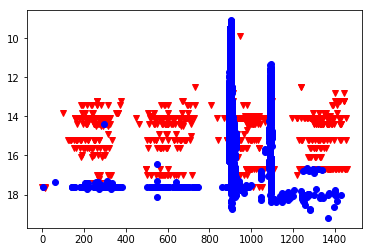

In [66]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(
    df.date[df.is_upper_limit],
    df.m[df.is_upper_limit],
    'rv',
)
plt.plot(
    df.date[np.logical_not(df.is_upper_limit)],
    df.m[np.logical_not(df.is_upper_limit)],
    'bo',
)
plt.gca().invert_yaxis()